# EP 1 -  Visão e Processamento de Imegens

###Integrantes do grupo:

-> Ciro Akiyoshi Higashi - nusp:10736858

-> Lucas Giannella de Oliveira - nusp:10336021

-> Link do Git: https://github.com/Cirokun/MAC0417-MAC5768

-> Link para o Google Drive: https://drive.google.com/drive/folders/1XpCSR3Y4duvCiiM4MJWUd_5gkdwhwVqx?usp=sharing 

## Importação de bibliotecas

In [ ]:
from google.colab import drive
import os
import re
import sys
import matplotlib.pyplot as plt
import math
import numpy as np
from skimage import io
from tabulate import tabulate
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Resumo do código
O código desenvolvido abaixo foi feito para montar um dataset de imagens a partir de um diretório com arquivos de imagens, de mesma resolução, nomeados de forma regular: 

ObjetoN_Local_Horario_Fundo_Repeticao.jpg

Como exemplo: Caneca1_In_D_A_1.jpg  

> Caneca numero 1  
> Dentro de casa  
> De Dia  
> No Fundo A  
> Primeira repetição  

O programa todo foi feito para fucionar de forma geral e não só para o caso do EP.  
Esta montagem do dataset ocorre em três etapas:   
>1- Caregamento das imagens  
>2- Criacao da tabela sumaria   
>3- Exibição de um recorte da base de dados




    


## Setup do diretório  
Neste passo todas as imagens são carregadas para uma coleção de imagens da biblioteca SkImage

In [ ]:
os.chdir('/content/drive/MyDrive/MAC5768/EP1')

imgs = io.imread_collection("Data/*.jpg")

## Funções para print da tabela sumária
Em resumo o proximo trecho de codigo gera uma dicionário com todos os obejtos e varições de fundos e iluminação. A sequencia para isto é:  
>1- Todos os nomes de arquivos são lidos e convertidos em objetos.  
>2- Os nomes são segmentados e colocados em atributos.  
>3- As partes segemntadas sao adicionadas ao dicionário e contadas 


In [ ]:
class Picture(object):
  def __init__(self, obj, inst, loc, when, bg, rep):
    self.obj = obj
    self.inst = inst
    self.loc = loc
    self.when = when
    self.bg = bg
    self.rep = rep
  
  def __str__(self):
    return (
      f"{self.obj} #{self.inst} {self.loc} {self.when} com o fundo {self.bg}"
      f" - repetição #{self.rep}"
    )
  
  def norep(self):
    return (
      f"{self.obj} #{self.inst} {self.loc} {self.when} com o fundo {self.bg}"
    )

  @classmethod
  def from_fn(cls, fn, angry = False):
    pat = re.compile(r"^([^_]+)(\d+)_(In|Out)_(D|N)_(\w)_(\d+).jpe?g")
    match = pat.search(fn)
    if not match:
      if angry:
        raise ValueError(f"Nome de arquivo não deu match: {fn}")
      return None
    else:
      obj = match.group(1)
      inst = int(match.group(2))
      loc = "dentro de casa" if match.group(3) == "In" else "fora de casa"
      when = "de dia" if match.group(4) == "D" else "de noite"
      bg = match.group(5)
      rep = int(match.group(6))
      return cls(obj, inst, loc, when, bg, rep)
  
  def illum(self):
    return f"{self.loc} e {self.when}"

def make_objs(fnl, angry = False):
  dicio = {}
  for fn in fnl:
    pic = Picture.from_fn(fn, angry)
    if pic is None:
      continue
    if pic.obj not in dicio:
      dicio[pic.obj] = []
    dicio[pic.obj].append(pic)
  return dicio

def lenum(l):
  l = list(l)
  l.sort()
  return "{}, e {}".format(", ".join(l[:-1]), l[-1])

def plural(p):
  p = p.lower()
  excecoes = {}
  if p in excecoes:
    return excecoes[p]
  else:
    return p + "s"

def summary(dirpath, angry = False):
  fnl = os.listdir(dirpath)
  dicio = make_objs(fnl, angry)
  nomes = list(dicio.keys())
  pls = lenum(map(plural, nomes))
  print(f"Temos {len(nomes)} objetos: {pls}.\n")
  print("Detalhes para cada objeto:\n")
  for name, pics in dicio.items():
    num_objs = len(set([pic.inst for pic in pics]))
    bgs = set([pic.bg for pic in pics])
    illums = set([pic.illum() for pic in pics])
    tot = len(pics)
    reps = {}
    for pic in pics:
      nr = pic.norep()
      if nr not in reps:
        reps[nr] = 0
      reps[nr] += 1
    nreps = list(reps.values())
    m, n = (min(nreps), max(nreps))
    repcnt = n if m == n else f"de {m} a {n}"
    print(f"==> {name}s: {tot} amostras")
    print(f"  => {num_objs} objetos diferentes")
    print(f"  => {len(bgs)} variações de fundo: {lenum(bgs)}")
    print(f"  => {len(illums)} condições de iluminação:")
    for illum in illums:
      print(f"    => {illum}")
    print(f"  => repetições: {repcnt} por combinação")
    print("")


## Print da tabela sumária
Aqui os dados extraidos anteriormente e os dados do conjunto geral são exibidos para o utilizador

In [ ]:
coll_size=len(imgs.files)

tamanho=0
for i in range(0,coll_size):
  tamanho=tamanho+math.ceil(os.path.getsize(imgs.files[i])/(1024*1024))

print(tabulate([['Número de classes', 10], 
                ['Número de imagens', coll_size],
                ['Tamanho da base (MiB)', tamanho],
                ['Resolução das imagens', f"{imgs[0].shape[0]}x{imgs[0].shape[1]}"]], 
               headers=['Descricao', 'Valor'], tablefmt='pretty'))

summary("Data", True)

+-----------------------+-----------+
|       Descricao       |   Valor   |
+-----------------------+-----------+
|   Número de classes   |    10     |
|   Número de imagens   |   1080    |
| Tamanho da base (MiB) |   3050    |
| Resolução das imagens | 2248x4000 |
+-----------------------+-----------+
Temos 10 objetos: canecas, chaves, dados, escovas, fidgets, garfos, laranjas, meias, moedas, e pratos.

Detalhes para cada objeto:

==> Chaves: 108 amostras
  => 3 objetos diferentes
  => 3 variações de fundo: A, B, e C
  => 4 condições de iluminação:
    => fora de casa e de dia
    => dentro de casa e de dia
    => dentro de casa e de noite
    => fora de casa e de noite
  => repetições: 3 por combinação

==> Meias: 108 amostras
  => 3 objetos diferentes
  => 3 variações de fundo: A, B, e C
  => 4 condições de iluminação:
    => fora de casa e de dia
    => dentro de casa e de dia
    => dentro de casa e de noite
    => fora de casa e de noite
  => repetições: 3 por combinação

==> Dad

## Visualização da base de dados
Neste bloco 30 imagens são sorteadas da base de dados e exibidas, rodar varias vezes retornará resultados diferentes

Step Size = 15


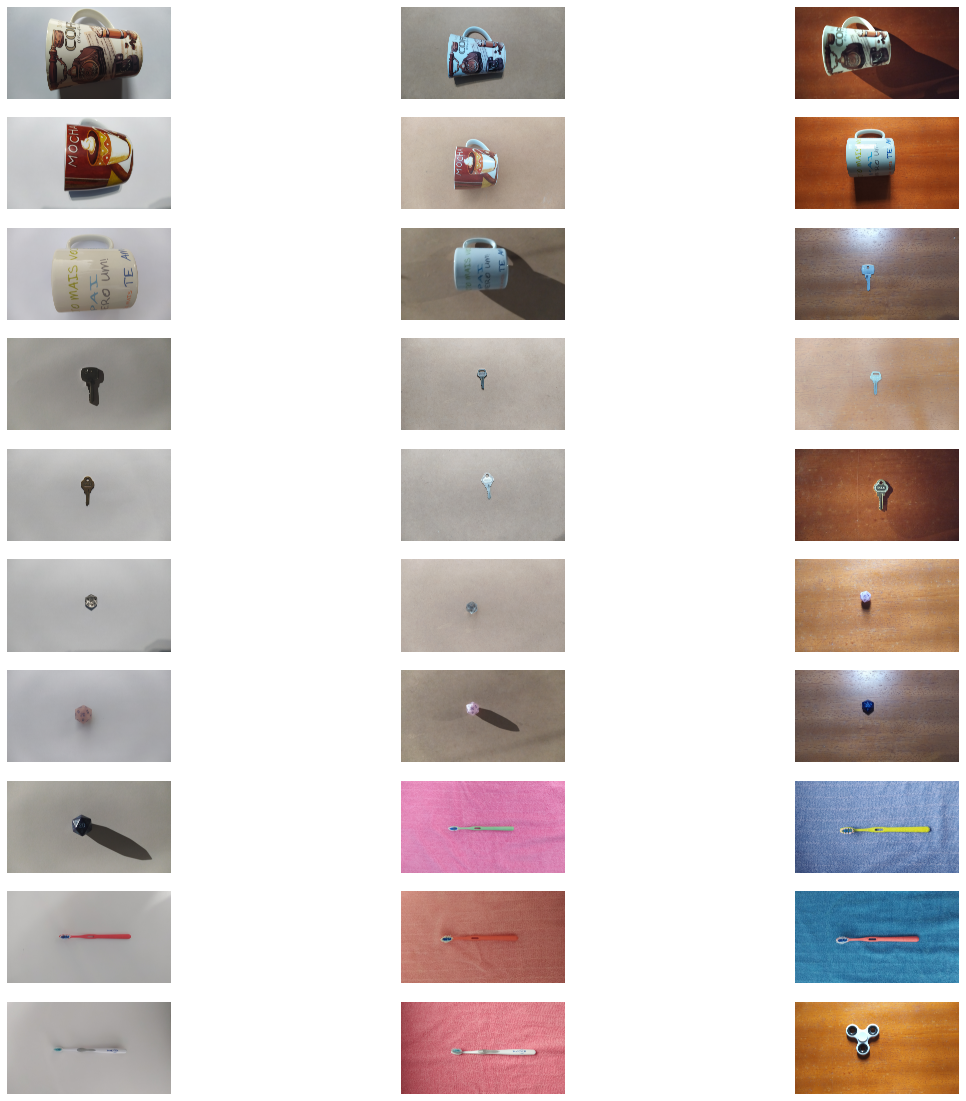

In [ ]:
n_colunas = 3  
n_linhas = 10
step_size=math.floor((coll_size//(n_colunas*n_linhas))*np.random.rand())
print(f"Step Size = {step_size}")
num_fotos = n_colunas * n_linhas

fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 20))

for e in range(0,num_fotos):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].imshow(imgs[e*step_size])
    axs[l, c].axis('off')
plt.show()